In [2]:
"""
July 7, 2020

Looking at results of the MCMCs.
"""

import ares
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import distpy

In [3]:
# Independent variables
redshifts = np.sort(np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75]))

Ms = np.linspace(7, 12, 60)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('logbins', Ms)]
blob_f1 = ['StellarMassFunction']

In [49]:
anl = ares.analysis.ModelSet('MCMC_files/fract_test3SQ')

labels = \
{
     #A
    'pq_func_par0[7]': '$a_1$', #const
    'pq_func_par1[7]': '$a_0$', #offset
    'pq_func_par2[7]': '$m_a$', #m

    #B
    'pq_func_par0[8]': '$b_1$', #const
    'pq_func_par1[8]': '$b_0$', #offset
    'pq_func_par2[8]': '$m_b$', #m

    #C
    'pq_func_par0[9]': 'C', #const
    #D
    'pq_func_par0[10]': 'D', #const
}

anl.custom_labels = labels

# anl.skip = 128*100


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : MCMC_files/                                                                            ####
#### prefix      : fract_test3SQ                                                                          ####
#### N-d         : 8                                                                                      ####


In [50]:
# data = anl.ExtractData(['galaxy_smf', 'galaxy_sfrd'])
# print(data['galaxy_smf'])
# print(data['galaxy_sfrd'][0])

# print(data)

# Loading MCMC_files/fract_test3SQ.dd*.chain.pkl...
# Loaded MCMC_files/fract_test3SQ.dd*.chain.pkl in 0.33 s.
# Loaded MCMC_files\fract_test3SQ.dd0000.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0001.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0002.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0003.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0004.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0005.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0006.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0007.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0008.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0009.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0010.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0011.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0012.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\fract_test3SQ.dd0013.blob_2d.galaxy_s

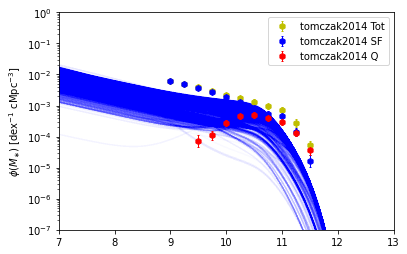

In [51]:
#look at the raw LF samples

z = 1.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
# gpop.PlotSMF(z, ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="y", ecolor='y', mec='y', label="tomczak2014 Tot", quantity="smf_tot", ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014",  label="tomczak2014 SF", color="b", ecolor='b',  mec='b', ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="r", ecolor='r',  mec='r', label="tomczak2014 Q", quantity="smf_q", ax=ax, round_z=0.2, log10Mass=True)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

In [52]:
params = \
[
     #A
    'pq_func_par0[7]',
    'pq_func_par1[7]',
    'pq_func_par2[7]', 

    #B
    'pq_func_par0[8]',
    'pq_func_par1[8]', 
    'pq_func_par2[8]',

    #C
    'pq_func_par0[9]',
    #D
    'pq_func_par0[10]', 

]

# print(anl.nwalkers)

0 of 5000 chain elements ignored because of chain links with inf's/nan's.


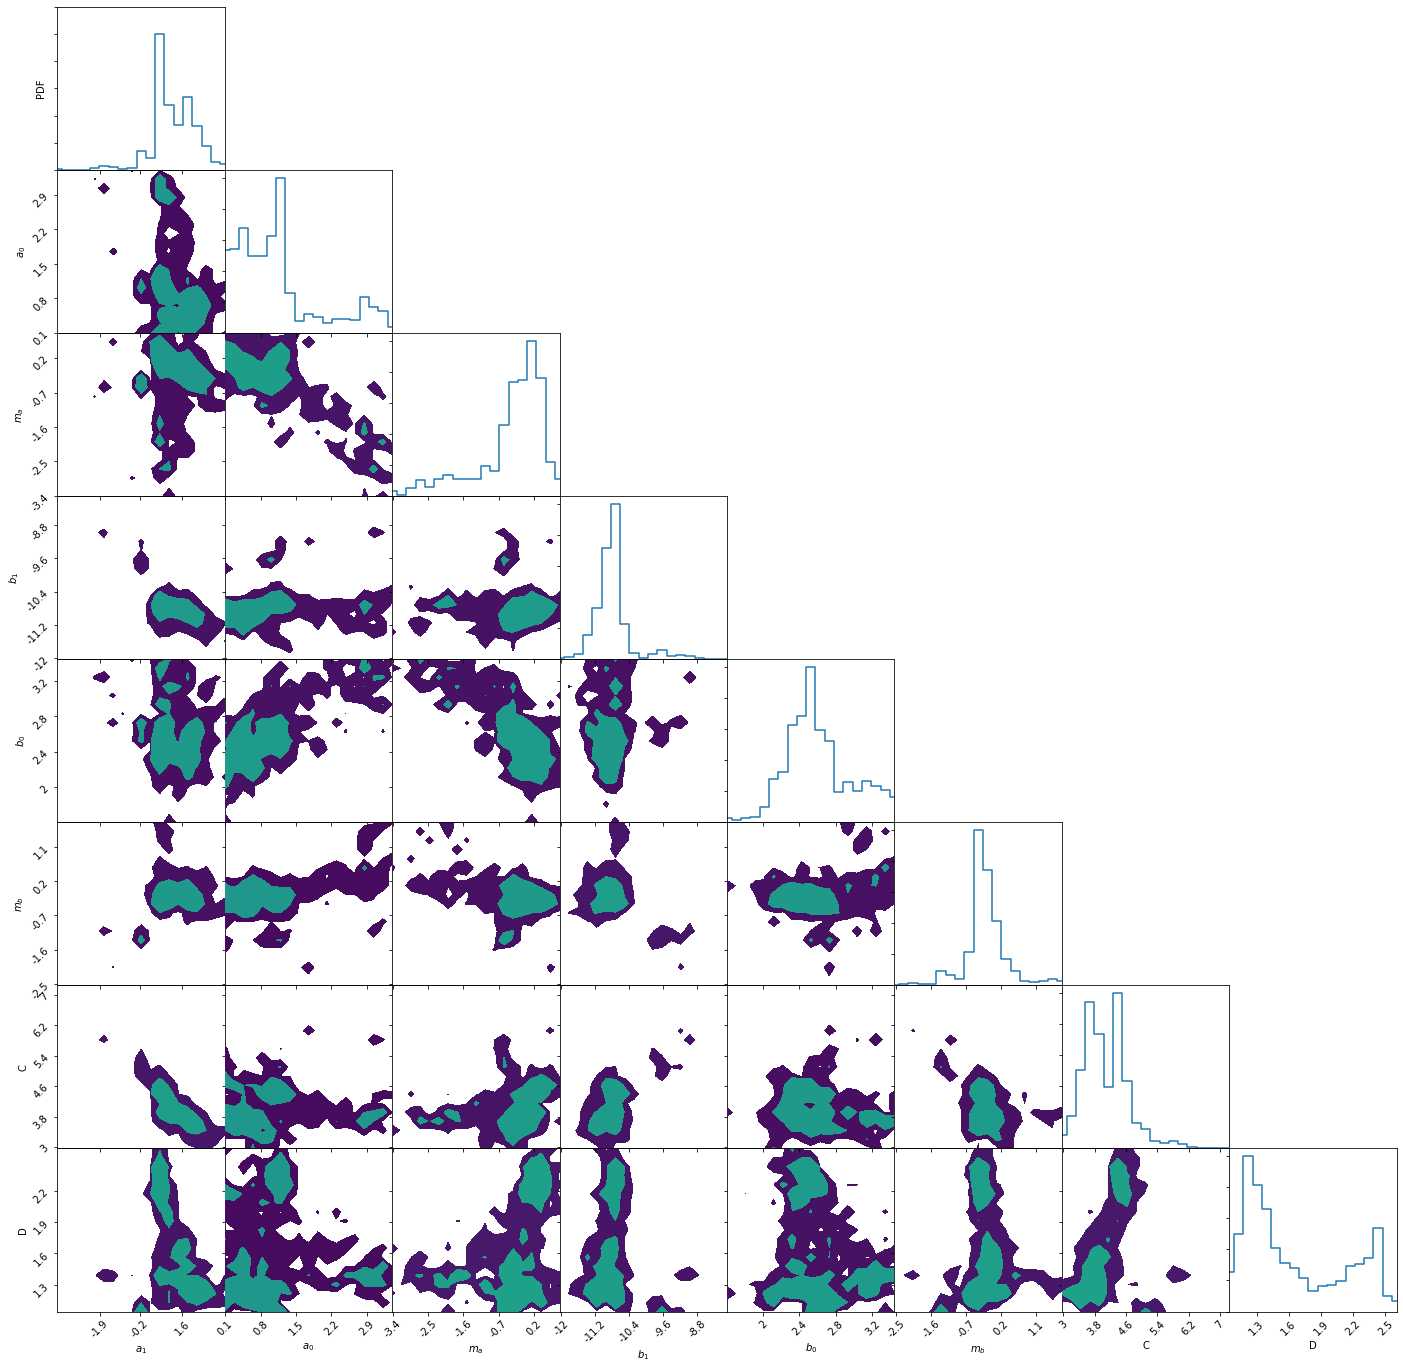

In [53]:
trig = anl.TrianglePlot(pars=params, color_by_like=True)

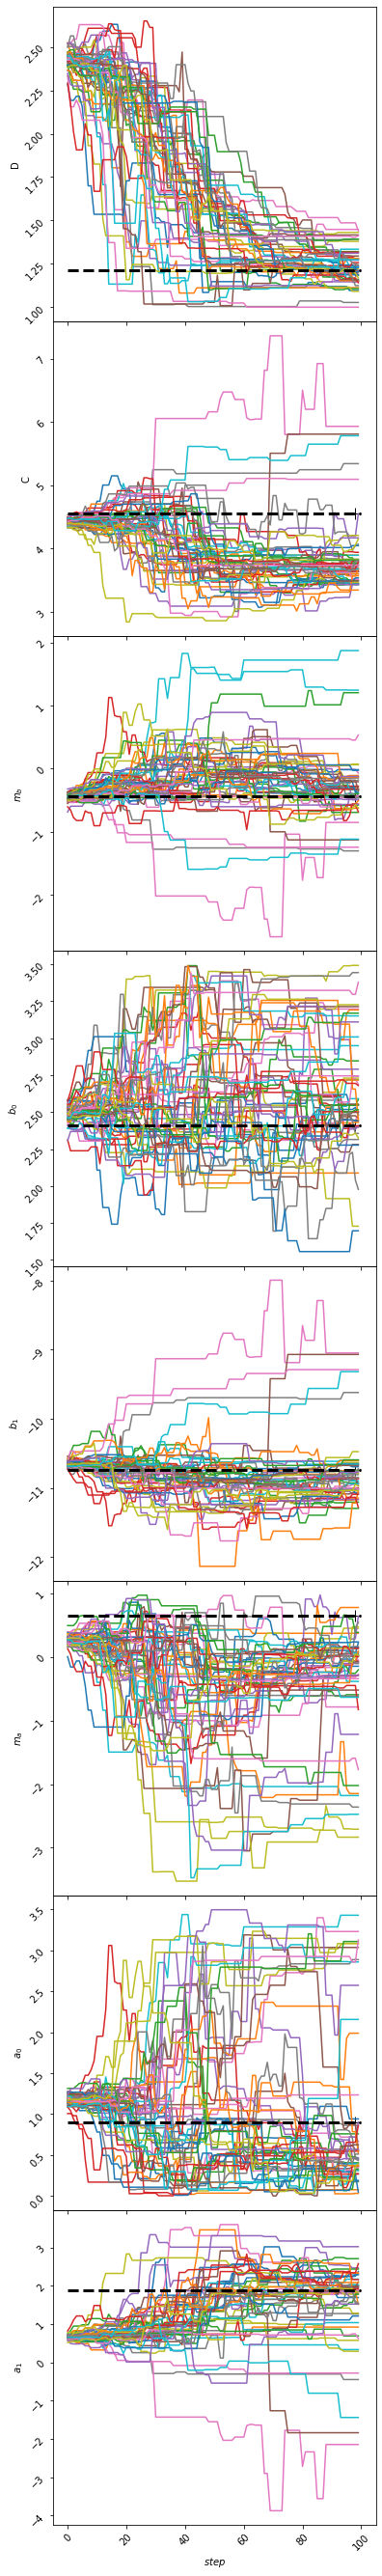

In [54]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')

In [55]:
# print(anl.max_likelihood_parameters())

covar = anl.CovarianceMatrix(params)

In [56]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch, pop_sf_type='sf')
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [57]:
fit_best_like = anl.max_likelihood_parameters()

fit_best_median = anl.max_likelihood_parameters()

# print(fit_best_like)

for i in range(len(covar[0])):
#     print(fit_best_like[params[i]])
    print(anl.get_1d_error(params[i], peak="mode")) #(maximum likelihood value, positive error, negative error).
#     print(params[i], anl.get_1d_error(params[i], peak="mode")[0])
    fit_best_median[params[i]] = anl.get_1d_error(params[i], peak="median")[0]


(1.8715519745099205, array([0.23942869, 1.25330928]))
(0.9045285127723524, array([1.06110564, 0.57035673]))
(0.6428136924684735, array([-0.33241026,  1.79898912]))
(-10.73739330415807, array([0.13391966, 0.36230117]))
(2.4087583897772777, array([0.64719269, 0.10474035]))
(-0.44216367868395423, array([0.58867812, 0.05581259]))
(4.550301735315303, array([0.00420277, 1.01034507]))
(1.2122584836285282, array([ 1.08166283, -0.00368865]))


In [58]:
pars_best = ares.util.ParameterBundle("emma:model1")

# print(fit_best_like)

pars_best.update(fit_best_like, pop_sf_type='sf')
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)

# pars_best_median = ares.util.ParameterBundle("emma:model1")
# pars_best_median.update(fit_best_median)
# pop_best_median = ares.populations.GalaxyPopulation(**pars_best_median)

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


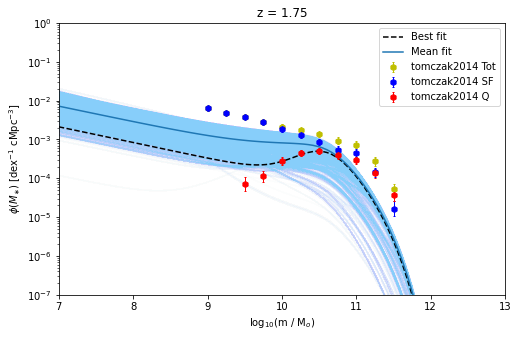

In [59]:
# z = 0.875
z = 1.75


fig, ax = pl.subplots(figsize=(8, 5))
Ms_short = np.linspace(7, 12, 80)

ls_best = pop_best.StellarMassFunction(z, Ms_short)

# print(ls_best)

ls_mean = pop_mean.StellarMassFunction(z, Ms_short)

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='lightskyblue', alpha=0.01, ax=ax)

obslf = ares.analysis.GalaxyPopulation()
# obslf.PlotSMF(z=z, ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="y", ecolor='y', mec='y', label="tomczak2014 Tot", quantity="smf_tot", ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014",  label="tomczak2014 SF", color="b", ecolor='b',  mec='b', ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="r", ecolor='r',  mec='r', label="tomczak2014 Q", quantity="smf_q", ax=ax, round_z=0.2, log10Mass=True)

pl.semilogy(Ms_short, ls_best, label='Best fit', color='black', ls="--")

pl.semilogy(Ms_short, ls_mean, label='Mean fit')

pl.title("z = %.2f" %z)
pl.xlabel("log$_{10}$(m / M$_o$)")
pl.legend()
# pl.ylim(1e-15, 1e2)
pl.show()

(1.8715519745099205, array([0.23942869, 1.25330928]))
1.8715519745099205


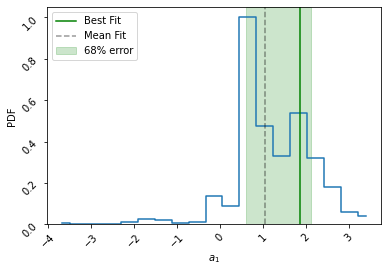

In [60]:
bests = [anl.get_1d_error(i, nu=0.68,  peak='mode') for i in params]
means = [anl.get_1d_error(i, nu=0.68,  peak='median') for i in params]
fit_best_like 

i = 0
print(bests[i])

# anl.get_1d_error(params[i], peak="median")

pars = ares.util.ParameterBundle("emma:model1")

print(fit_best_like[params[i]])
# pars_mean[params[i]]

ax = anl.PosteriorPDF(pars=params[i])

# pl.axvline(x=fit_best_like[params[i]], ls="-", color="red", label="Best Fit in range")

#best fit with mode
pl.axvline(x=bests[i][0], ls="-", color="green", label="Best Fit")
ax.axvspan(bests[i][0]-bests[i][1][1], bests[i][0]+bests[i][1][0], alpha=0.2, color='green' ,label="68% error")

#best fit with mode
# pl.axvline(x=bests_m[i][0], ls="-", color="purple", label="Best Fit Med")
# ax.axvspan(bests_m[i][0]-bests_m[i][1][1], bests_m[i][0]+bests_m[i][1][0], alpha=0.2, color='purple' ,label="68% error")

pl.axvline(x=means[i][0], ls="--", color="black", label="Mean Fit",  alpha=0.4)

pl.legend()
pl.show()

In [22]:
# ticks = np.linspace(0, len(anl.logL)-1, len(anl.logL))

# xstart = 30000

# maxL = anl.logL[31549]

# # print(anl.logL[35314])
# # print(anl.logL[1344-10:1344+10])

# pl.axvline(x=31549, color="yellow", label=str(maxL))

# pl.plot(ticks[xstart:], anl.logL[xstart:])
# pl.plot(ticks, anl.logL)
# pl.ylabel("logLikelihood")

# # pl.ylim(-500, 1500)
# pl.legend()
# pl.show()